In [1]:
# We'll use NetworkX to represent graphs in python
import networkx as nx
# You may need to `pip install networkx` or `pip3 install networkx`

# https://networkx.github.io/documentation/stable/tutorial.html

In [34]:

# You can use it like the following:

G = nx.DiGraph()
G.add_edge(1, 2, weight=2)
G.add_edge(1, 3, weight=4)
G.add_edge(3, 4, weight=1)
G.add_edge(4, 2, weight=1)

# Now we have a graph

for out in G[1]:
    print("Edge between 1 and", out, "of weight", G[1][out]['weight'])

Edge between 1 and 2 of weight 2
Edge between 1 and 3 of weight 4


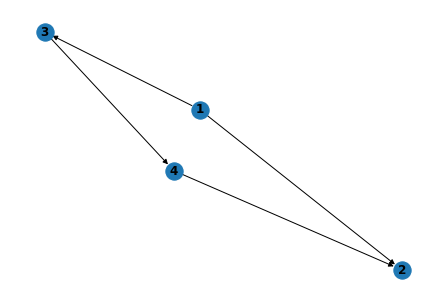

In [3]:
# You can also draw them, if you'd like:

import pylab
%matplotlib inline

nx.draw(G, with_labels=True, font_weight='bold')

In [35]:
# Let's start with problem 14 from the book.
# (http://jeffe.cs.illinois.edu/teaching/algorithms/book/05-graphs.pdf)
# This was the problem of finding the shortest path of length divisible by 3.


# First, pretend we didn't have the requirement that length be divisible by 3:
G = nx.DiGraph()

G.add_edges_from(['sw',
                  'wt', 'wy',
                  'yz', 'yx', 'zt', 'xs'])

nx.shortest_path(G, 's', 't')
# (Internally, on unweighted graphs, this is doing a BFS.
#  But it doesn't matter what it's doing; just that it's linear.)

['s', 'w', 't']

In [59]:
# The problem, of course, is that the above path is length 2, which isn't divisible by 3.
# To solve the actual problem, we make a new graph.

# Note that networkx doesn't care what you call vertices; so we can label our vertices with tuples like ('w', 2).

def construct_graph_14(inputG):
    """Transform an input graph for problem 14 into one where the shortest path results in the answer.
    
    Returns: a triple of (new graph, new start, new finish)
    """
    outG = nx.DiGraph()
    for (u,v) in inputG.edges():
        for i in range(3):
            outG.add_edge((u, i), (v, (i+1)%3))
    return outG, ('s', 0), ('t', 0)

print(nx.shortest_path(*construct_graph_14(G)))
print("--------")
print(*construct_graph_14(G)[0].edges())

[('s', 0), ('w', 1), ('y', 2), ('x', 0), ('s', 1), ('w', 2), ('t', 0)]
--------
(('s', 0), ('w', 1)) (('w', 1), ('t', 2)) (('w', 1), ('y', 2)) (('s', 1), ('w', 2)) (('w', 2), ('t', 0)) (('w', 2), ('y', 0)) (('s', 2), ('w', 0)) (('w', 0), ('t', 1)) (('w', 0), ('y', 1)) (('y', 1), ('z', 2)) (('y', 1), ('x', 2)) (('y', 2), ('z', 0)) (('y', 2), ('x', 0)) (('y', 0), ('z', 1)) (('y', 0), ('x', 1)) (('z', 1), ('t', 2)) (('z', 2), ('t', 0)) (('z', 0), ('t', 1)) (('x', 1), ('s', 2)) (('x', 2), ('s', 0)) (('x', 0), ('s', 1))


In [52]:
# So to fully solve it, we just transform the output.

def solve_14(inputG):
    try:
        path = nx.shortest_path(*construct_graph_14(G))
    except nx.NetworkXNoPath:
        return None
    
    return [item[0] for item in path]

solve_14(G)
# should be ['s', 'w', 'y', 'x', 's', 'w', 't']

['s', 'w', 'y', 'x', 's', 'w', 't']

In [92]:
# Now, your turn for problem 11:
import random

table = \
[(3,5,7,4,6),
 (5,3,1,5,3),
 (2,8,3,1,4),
 (4,5,7,2,3),
 (3,1,3,2,0)]


def construct_graph_11(table):
    graph = nx.DiGraph()
    i = 0
    for row in table: 
        i += 1
        j = 0
        for sqr in row:
            j+=1
            v = table[i-1][j-1]
            graph.add_edge((i,j), (i,j-v))
            graph.add_edge((i,j), (i,j+v))
            graph.add_edge((i,j), (i+v,j))
            graph.add_edge((i,j), (i-v,j))
    source = (1,1)
    target = (5,5)
    return graph, source, target


def solve_11(table):
    try:
        path = nx.shortest_path(*construct_graph_11(table))
    except nx.NetworkXNoPath:
        return []
    return path

print("Example 11 from book:", solve_11(table), len(solve_11(table))) # should be a length-8 path, so 9 entries

Example 11 from book: [(1, 1), (1, 4), (5, 4), (5, 2), (5, 3), (2, 3), (2, 2), (2, 5), (5, 5)] 9


In [95]:

def construct_random_input(n, k):
    return [[random.randint(1, k) for _ in range(n)] for _ in range(n)]

for (n, k) in (8,8), (30, 8), (300, 8), (300, 150):
    print(f"Random size {n} example with nums up to {k}:", "path length = ", len(solve_11(construct_random_input(n, k))))

Random size 8 example with nums up to 8: path length =  0
Random size 30 example with nums up to 8: path length =  6
Random size 300 example with nums up to 8: path length =  7
Random size 300 example with nums up to 150: path length =  12


Final Part
---------------


Do the same for one other problem from the [book](http://jeffe.cs.illinois.edu/teaching/algorithms/book/05-graphs.pdf) that we did not cover in class: one of 22-27.

Describe in English what the graph you construct is, then give the code to construct it.

In [17]:

# for problem 23 in the book we construct a graph containing all the possible positions of the red and green
# game pieces as the vertices and the 8 or fewer possible moves from that position are the edges. Because a blocker square (1) can
# appear at any place on a given board any of the n^4 positions are possible for some board with the right initial
# layout. However, not all positions are possible for every board, but to generalize the graph construction I looped through all
# n^4 possible positions because the target and blockers are unknown. Thus, constructing the graph takes 0(n^4) time. 

import random 
import networkx as nx

def construct_rand_board(n, b):
    # n is the nxn board and b is the number of bloacked squares
    table = []
    for  i in range(0,n):
        list = []
        for i in range(0,n):
            list.append(0)
        table.append(list)
    #define black pieces as int = 1
    for i in range(0,b):
        table[random.randint(0, n-1)][random.randint(0, n-1)] = 1
    #define the target as int = 2
    t1 = random.randint(0, n-1)
    t2 = random.randint(0, n-1)
    table[t1][t2] = 2
    #defibe Green piece as 3 and Red piece as 4
    assigned = False
    while assigned == False:
        g1 = random.randint(0, n-1)
        g2 = random.randint(0, n-1)
        r1 = random.randint(0, n-1)
        r2 = random.randint(0, n-1)
        if table[g1][g2] == 0 and table[r1][r2] == 0 and r1 != g1 and r2 != g2: 
            table[g1][g2] = 3
            table[r1][r2] = 4
            assigned = True
            
            
    return table, r1, r2, g1, g2, t1, t2


def construct_graph(baord):
    graph = nx.DiGraph()
    table, r1, r2, g1, g2, t1, t2 = board
    n = len(table[0])
    #loop through all possible positions
    for i in range(n):
        for j in range(n):
            for u in range(n):
                for v in range(n):
                    if ((table[i][j] != 1) and (table[u][v] != 1) and (table[u][v] != 2) and (table[i][j] != 2)):
                        args = (table, i, j, u, v)
                        graph = construct_graph_helper(graph, args)
    
    return graph, r1, r2, g1, g2, t1, t2

def construct_graph_helper(graph, args):
    # add a check to see if in winning position
    graph = graph
    table, r1, r2, g1, g2 = args
    #edges for r1 - up and down move 
    n = len(table[0])
    r1u = 0
    for i in reversed(range(0, r1)):
        if table[i][r2] == 0:
            r1u = i
        else:
            break
    if r1u != r2:
        graph.add_edge((r1,r2,g1,g2),(r1u,r2,g1,g2))
            
    r1d = 0
    for i in range(r1, n):
        if table[i][r2] == 0:
            r1d = i
        else:
            break
    if r1d != r1:
        graph.add_edge((r1,r2,g1,g2),(r1d,r2,g1,g2))
    #edges for r2 - left and right
    r2r = 0
    for i in reversed(range(0, r2)):
        if table[r1][i] == 0:
            r2r = i
        else:
            break
    if r2r != r2:
        graph.add_edge((r1,r2,g1,g2),(r1,r2r,g1,g2))
           
    r2l = 0
    for i in range(r2, n):
        if table[r1][i] == 0:
            r2l = i
        else:
            break
    if r2l != r2:
        graph.add_edge((r1,r2,g1,g2),(r1,r2l,g1,g2))
    #edges for g1 - up and down move 
    g1u = 0
    for i in reversed(range(0, g1 )):
        if table[i][g2] == 0:
            g1u = i
        else:
            break
    if g1u != g1:
        graph.add_edge((r1,r2,g1,g2),(r1,r2,g1u,g2))

    g1d = 0
    for i in range(g1, n):
        if table[i][g2] == 0:
            g1d = i
        else:
            break
    if g1d != g1:
        graph.add_edge((r1,r2,g1,g2),(r1,r2,g1d,g2))
    #edges for g2 - left and right
    g2r = 0
    for i in reversed(range(0, g2)):
        if table[g1][i] == 0:
            g2r = i
        else:
            break
    if g2r != g2:
        graph.add_edge((r1,r2,g1,g2),(r1,r2,g1,g2r))

    g2l = 0
    for i in range(g2, n):
        if table[g1][i] == 0:
            g2l = i
        else:
            break
    if g2l != g2:
        graph.add_edge((r1,r2,g1,g2),(r1,r2,g1,g2l))
    
    return graph


def solve_23(input):
    graph, r1, r2, g1, g2, t1, t2 = input 
    print(r1, r2, g1, g2, t1, t2)
    fin_pos = [ (t1-1,t2,t1+1,t2), (t1-1,t2,t1,t2-1),(t1-1,t2,t1,t2+1),(t1,t2+1,t1,t2-1),(t1,t2+1,t1+1,t2),(t1+1, t2, t1, t2-1)]
    min_len = float("inf")
    final_path = []
    for pos in fin_pos:
        if pos in graph.nodes():
            try:
                path = nx.shortest_path(graph, (r1, r2, g1, g2), pos)
                if len(path) < min_len and path != []:
                    min_len = len(path)
                    final_path = path
            except nx.NetworkXNoPath:
                final_path = final_path
    return path
        
    
    
    
    
    
    
board = construct_rand_board(4, 1)
print(board)
result = construct_graph(board)    
print(solve_23(result))

([[0, 0, 0, 2], [0, 0, 0, 0], [0, 0, 0, 4], [3, 0, 1, 0]], 2, 3, 3, 0, 0, 3)
2 3 3 0 0 3
[(2, 3, 3, 0), (1, 3, 3, 0), (1, 3, 0, 0), (1, 3, 0, 2)]


In [7]:
print(result)

(<networkx.classes.digraph.DiGraph object at 0x3f47730>, 0, 1, 3, 3, 2, 0)


{(1, 0, 0, 2): {(1, 0, 0, 2): [(1, 0, 0, 2)], (3, 0, 0, 2): [(1, 0, 0, 2), (3, 0, 0, 2)], (1, 3, 0, 2): [(1, 0, 0, 2), (1, 3, 0, 2)], (1, 0, 3, 2): [(1, 0, 0, 2), (1, 0, 3, 2)], (1, 0, 0, 0): [(1, 0, 0, 2), (1, 0, 0, 0)], (1, 0, 0, 3): [(1, 0, 0, 2), (1, 0, 0, 3)], (0, 0, 0, 2): [(1, 0, 0, 2), (3, 0, 0, 2), (0, 0, 0, 2)], (3, 3, 0, 2): [(1, 0, 0, 2), (3, 0, 0, 2), (3, 3, 0, 2)], (3, 0, 3, 2): [(1, 0, 0, 2), (3, 0, 0, 2), (3, 0, 3, 2)], (3, 0, 0, 0): [(1, 0, 0, 2), (3, 0, 0, 2), (3, 0, 0, 0)], (3, 0, 0, 3): [(1, 0, 0, 2), (3, 0, 0, 2), (3, 0, 0, 3)], (0, 3, 0, 2): [(1, 0, 0, 2), (1, 3, 0, 2), (0, 3, 0, 2)], (1, 1, 0, 2): [(1, 0, 0, 2), (1, 3, 0, 2), (1, 1, 0, 2)], (1, 3, 3, 2): [(1, 0, 0, 2), (1, 3, 0, 2), (1, 3, 3, 2)], (1, 3, 0, 0): [(1, 0, 0, 2), (1, 3, 0, 2), (1, 3, 0, 0)], (1, 3, 0, 3): [(1, 0, 0, 2), (1, 3, 0, 2), (1, 3, 0, 3)], (1, 0, 1, 2): [(1, 0, 0, 2), (1, 0, 3, 2), (1, 0, 1, 2)], (1, 0, 3, 0): [(1, 0, 0, 2), (1, 0, 3, 2), (1, 0, 3, 0)], (1, 0, 3, 3): [(1, 0, 0, 2), (1, 0, 3,